# ROC/AUC Analysis

*By Pejman*

---

**LinkedIn** | **GitHub** | **HuggingFace**

- [LinkedIn](https://www.linkedin.com/in/pejman-ebrahimi-4a60151a7/)  
- [GitHub](https://github.com/arad1367)  
- [HuggingFace](https://huggingface.co/arad1367)


# 1. Four key metrics used to evaluate the performance of a classification model

![metrics](https://www.researchgate.net/publication/318859551/figure/fig5/AS:615588489621513@1523779141997/Structure-of-the-confusion-matrix-with-TP-FN-FP-and-TN-values.png)

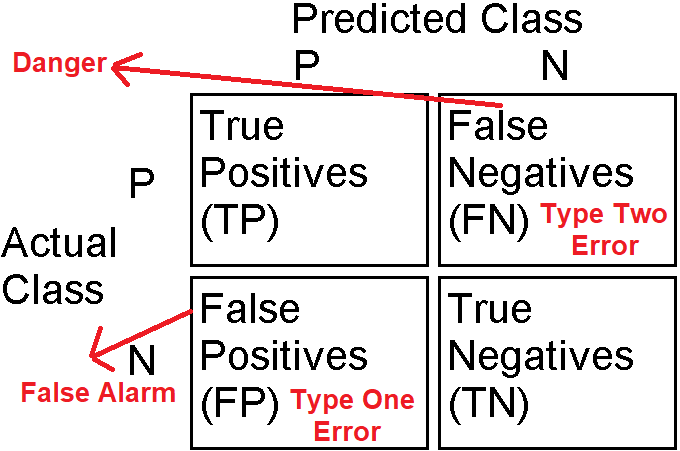

In [ ]:
from IPython.display import Image
Image("/content/TPFPFNFP.png")

When you predict, four outcomes are possible:

- **True Positive (TP):** Model predicts `1` and the true label is `1`. You correctly flag a patient with heart disease.
- **True Negative (TN):** Model predicts `0` and the true label is `0`. You correctly say no disease.
- **False Positive (FP):** Model predicts `1` but the true label is `0`. You raise a false alarm.
- **False Negative (FN):** Model predicts `0` but the true label is `1`. You miss a patient with disease.


# 2. Key Rates Derived from the Confusion Matrix

- **Sensitivity (Recall, True Positive Rate, TPR):**  
  TPR = TP / (TP + FN)  
  **Interpretation:** Of all sick patients, how many did we correctly catch?

- **Specificity (True Negative Rate, TNR):**  
  TNR = TN / (TN + FP)  
  **Interpretation:** Of all healthy patients, how many did we correctly dismiss?

- **False Positive Rate (FPR):**  
  FPR = 1 − Specificity = FP / (FP + TN)  
  **Interpretation:** Of all healthy patients, how many did we incorrectly flag?

- **Precision (Positive Predictive Value, not used in ROC directly but good to know):**  
  Precision = TP / (TP + FP)  
  **Interpretation:** Of all predicted sick patients, how many really are sick?


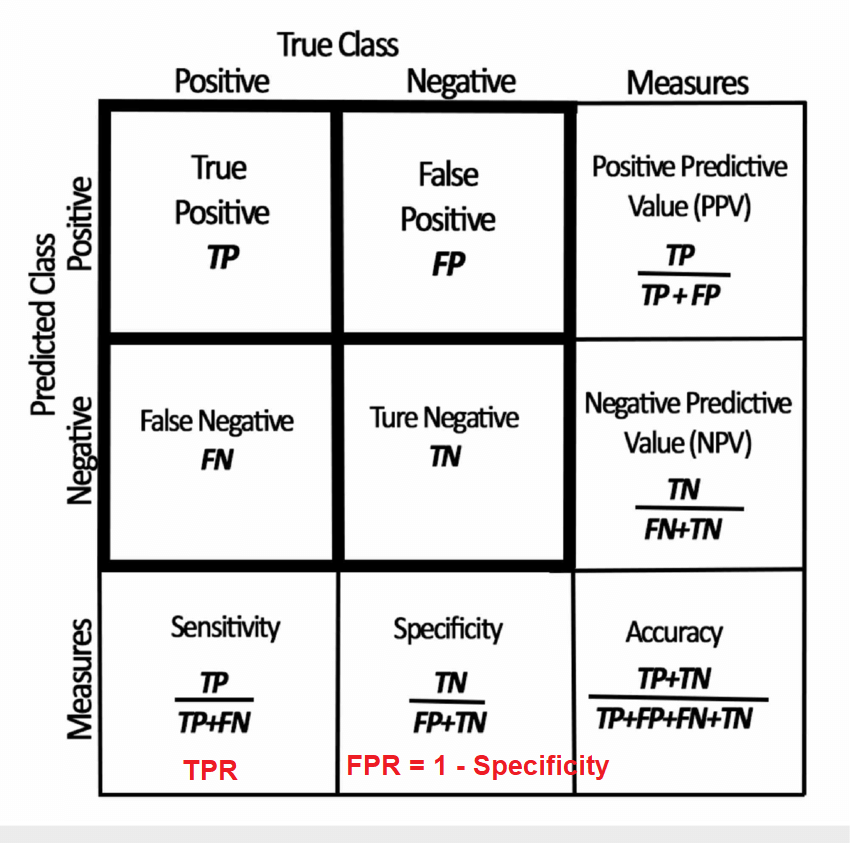

In [ ]:
Image("/content/TPR_FPR.png")

# 3. Thresholds and Probabilities

Many models (like Logistic Regression) output a **probability** `p` that the label is 1.  

You still need a **threshold** `τ`:

- If `p ≥ τ` → predict `1`  
- Else → predict `0`  

Different thresholds give different **TPR** and **FPR**:

- **Lower τ:** more predicted positives → higher TPR but also higher FPR  
- **Higher τ:** fewer predicted positives → lower TPR and lower FPR  

## Example

Suppose a model outputs the following probabilities for 5 patients:  

| Patient | True Label | Predicted Probability |
|---------|------------|---------------------|
| A       | 1          | 0.9                 |
| B       | 0          | 0.8                 |
| C       | 1          | 0.6                 |
| D       | 0          | 0.4                 |
| E       | 1          | 0.3                 |

- **Threshold τ = 0.5:** Predict 1 if p ≥ 0.5  
  - Predicted labels: A=1, B=1, C=1, D=0, E=0  
  - TPR = 2/3 (catch 2 out of 3 sick patients)  
  - FPR = 1/2 (1 healthy patient incorrectly flagged)

- **Threshold τ = 0.7:** Predict 1 if p ≥ 0.7  
  - Predicted labels: A=1, B=1, C=0, D=0, E=0  
  - TPR = 1/3  
  - FPR = 1/2


# 4. ROC Curve

**ROC** = Receiver Operating Characteristic curve.  

- It plots **TPR (y-axis)** vs **FPR (x-axis)** for all thresholds `τ` from 1 down to 0.  
- The **diagonal line** from (0,0) to (1,1) represents **random guessing**.  
- Better models **bend toward the top-left corner** (high TPR, low FPR for many thresholds).  

## Why ROC is Useful

- **Threshold-independent:** shows performance across all possible cutoffs.  
- **Robust to class imbalance:** performance remains meaningful even when the number of positive and negative examples differs (though for extreme imbalance, **PR curve** may be more informative for decisions).


![link text](https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/06/roc-curve.jpg?fit=1200%2C675&ssl=1)

# 5. AUC (Area Under the ROC Curve)

**AUC** or AUC score is a single number between 0 and 1 summarizing the ROC curve.  

- **Intuition:** AUC ≈ probability that a randomly chosen positive example is scored **higher** than a randomly chosen negative example.  

### Benchmarks
- 0.5 → random  
- 0.7–0.8 → acceptable  
- 0.8–0.9 → good  
- 0.9 → excellent (but be wary of overfitting/leakage)  

### What AUC is **not**
- It **does not measure calibration** (how close predicted probabilities are to true probabilities).  
- It **does not tell you the “best” threshold**; it only describes **ranking quality**.


![link text](https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c42679571ef35419c9968_64760779d5dc484958a3f917_classification_metrics_017-min.png)

# 6. Choosing a Threshold in Practice & Uncertainty/Validation

## Choosing a Threshold

- **Youden’s J statistic:**  
  J = TPR − FPR  
  The threshold `τ` that maximizes J is a simple, balanced choice.

- **Cost-based choice:**  
  If missing disease (FN) is much worse than false alarms (FP), choose a `τ` that achieves **higher TPR** even if FPR rises.

- **Domain-informed choice:**  
  Work with clinical stakeholders to set acceptable trade-offs.

## Uncertainty and Validation

- **Report AUC** on a held-out test set or via cross-validation.  
- **Provide confidence intervals** for AUC (e.g., via bootstrap).  
- **Avoid data leakage:** fit preprocessing and the model **only on training data**.


### Choosing a Threshold

- **Youden’s J statistic:** Pick the threshold where TPR − FPR is largest. This gives a good balance between catching positives and avoiding false alarms.  
- **Cost-based choice:** If missing a sick patient is very bad, pick a threshold that catches more positives, even if it means more false alarms.  
- **Domain-informed choice:** Ask experts (like doctors) what trade-off between false alarms and missed cases is acceptable.  

### Uncertainty and Validation

- **Test on new data:** Always test your model on data not used in training to see how well it really works.  
- **Report confidence intervals:** For metrics like AUC, report confidence intervals to show uncertainty.  
- **Avoid data leakage:** Only use training data to fit the model and preprocessing steps; don’t peek at test data.


### 7. Example

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, classification_report,
    precision_recall_curve, average_precision_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibrationDisplay

sns.set(style="whitegrid", context="notebook")
np.random.seed(42)

In [ ]:
### 1. load data

df = pd.read_csv("https://raw.githubusercontent.com/arad1367/WAC_November-2023/refs/heads/main/heart.csv")

print(df.info())
print(df['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
target
1    526
0    499
Name: count, dtype: int64


In [ ]:
### 2. Check missing values

df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
### 3. Split data --> train and test

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print('Train positives:', y_train.sum(), 'of', len(y_train))
print('Test  positives:', y_test.sum(), 'of', len(y_test))

Train positives: 421 of 820
Test  positives: 105 of 205


In [ ]:
### 4. Logistic regression pipeline

numeric_features = X.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_features)],
    remainder='drop'
)

logreg = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=2000, solver='lbfgs'))
])

logreg.fit(X_train, y_train)

# Predicted probabilities on the test set (for class 1)
y_proba_test = logreg.predict_proba(X_test)[:, 1]

In [ ]:
### 5. Compute ROC curve and AUC

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)
print(f'Logistic Regression Test AUC: {roc_auc:.3f}')

Logistic Regression Test AUC: 0.930


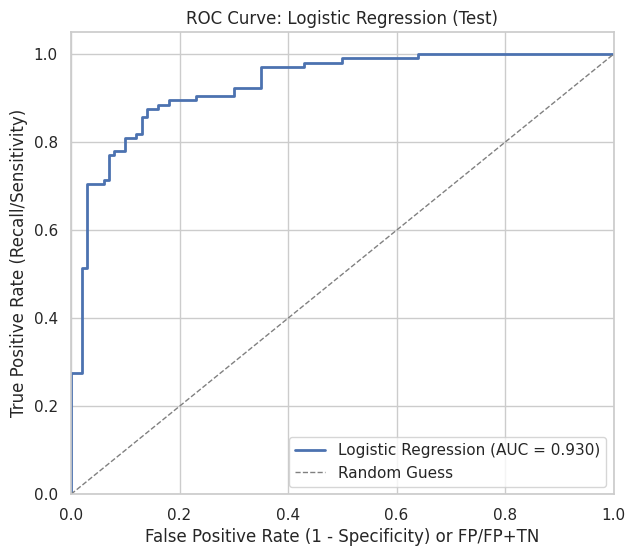

In [ ]:
### 6. Plot ROC

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, lw=2, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity) or FP/FP+TN')
plt.ylabel('True Positive Rate (Recall/Sensitivity)')
plt.title('ROC Curve: Logistic Regression (Test)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
### 7. Choose a threshold (Youden’s J)
### This is a balanced default that maximizes TPR − FPR

def threshold_by_youden_j(y_true, y_proba):
    fpr, tpr, thr = roc_curve(y_true, y_proba)
    j = tpr - fpr
    idx = np.argmax(j)
    return thr[idx], fpr[idx], tpr[idx], j[idx]

best_thr, best_fpr, best_tpr, best_j = threshold_by_youden_j(y_test, y_proba_test)
print(f'Youden J best threshold: {best_thr:.3f}, TPR={best_tpr:.3f}, FPR={best_fpr:.3f}, J={best_j:.3f}')

Youden J best threshold: 0.626, TPR=0.876, FPR=0.140, J=0.736


In [ ]:
### 8. Make predictions and inspect confusion matrix and metrics at this threshold

y_pred_test = (y_proba_test >= best_thr).astype(int)

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix (Test):')
print(cm)
print('\nClassification Report (Test):')
print(classification_report(y_test, y_pred_test, digits=3))

Confusion Matrix (Test):
[[86 14]
 [13 92]]

Classification Report (Test):
              precision    recall  f1-score   support

           0      0.869     0.860     0.864       100
           1      0.868     0.876     0.872       105

    accuracy                          0.868       205
   macro avg      0.868     0.868     0.868       205
weighted avg      0.868     0.868     0.868       205



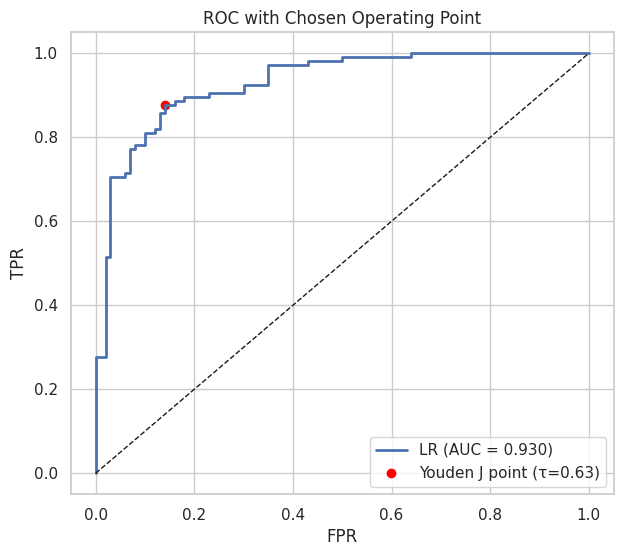

In [ ]:
### Visualize the threshold on ROC

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, lw=2, label=f'LR (AUC = {roc_auc:.3f})')
plt.scatter([best_fpr], [best_tpr], color='red', label=f'Youden J point (τ={best_thr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC with Chosen Operating Point')
plt.legend(loc='lower right')
plt.show()

### 9. Cost-sensitive threshold (clinical mindset)
#### If missing disease (FN) is, say, 5x worse than a false alarm (FP), choose τ to minimize expected cost.

In [ ]:
def find_threshold_min_cost(y_true, y_proba, cost_fn=5.0, cost_fp=1.0):
    fpr, tpr, thr = roc_curve(y_true, y_proba)
    p_pos = y_true.mean()
    p_neg = 1 - p_pos
    fn_rate = 1 - tpr
    fp_rate = fpr
    cost = cost_fn * p_pos * fn_rate + cost_fp * p_neg * fp_rate
    i = np.argmin(cost)
    return thr[i], cost[i], fpr[i], tpr[i]

tau_cost, min_cost, fpr_c, tpr_c = find_threshold_min_cost(y_test, y_proba_test, cost_fn=5.0, cost_fp=1.0)
print(f'Cost-min threshold: {tau_cost:.3f}, Expected cost={min_cost:.4f}, TPR={tpr_c:.3f}, FPR={fpr_c:.3f}')

y_pred_cost = (y_proba_test >= tau_cost).astype(int)
print('Confusion Matrix (Cost-min τ):\n', confusion_matrix(y_test, y_pred_cost))
print('\nClassification Report (Cost-min τ):')
print(classification_report(y_test, y_pred_cost, digits=3))

Cost-min threshold: 0.347, Expected cost=0.2439, TPR=0.971, FPR=0.350
Confusion Matrix (Cost-min τ):
 [[ 65  35]
 [  3 102]]

Classification Report (Cost-min τ):
              precision    recall  f1-score   support

           0      0.956     0.650     0.774       100
           1      0.745     0.971     0.843       105

    accuracy                          0.815       205
   macro avg      0.850     0.811     0.808       205
weighted avg      0.848     0.815     0.809       205



In [ ]:
### 10. AUC uncertainty: Bootstrap confidence interval

# How much our AUC is reliable on test

from sklearn.utils import resample

def bootstrap_auc_ci(y_true, y_proba, n_boot=2000, alpha=0.95, random_state=42):
    rng = np.random.default_rng(random_state)
    aucs = []
    y_true = np.array(y_true)
    y_proba = np.array(y_proba)
    n = len(y_true)
    for _ in range(n_boot):
        idx = rng.integers(0, n, n)
        fpr_b, tpr_b, _ = roc_curve(y_true[idx], y_proba[idx])
        aucs.append(auc(fpr_b, tpr_b))
    lower = np.percentile(aucs, (1 - alpha)/2 * 100)
    upper = np.percentile(aucs, (1 + alpha)/2 * 100)
    return float(np.mean(aucs)), float(lower), float(upper)

mean_auc, lo, hi = bootstrap_auc_ci(y_test, y_proba_test)
print(f'Bootstrap AUC: mean={mean_auc:.3f}, 95% CI [{lo:.3f}, {hi:.3f}]')

Bootstrap AUC: mean=0.930, 95% CI [0.895, 0.960]


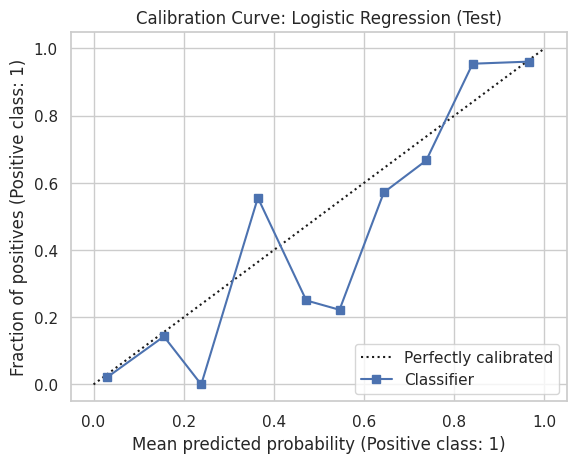

In [ ]:
### 11. Calibration check
####  ROC/AUC doesn’t measure calibration (how accurate the probabilities are)

CalibrationDisplay.from_predictions(y_test, y_proba_test, n_bins=10)
plt.title('Calibration Curve: Logistic Regression (Test)')
plt.show()

# 12. Summary

We model heart disease risk as a **binary classification** problem. Predictions lead to four outcomes: **True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)**. From these, we compute:

- **True Positive Rate (TPR / Sensitivity)**
- **False Positive Rate (FPR / 1 − Specificity)**

The **ROC curve** plots TPR vs FPR across all thresholds. The **AUC (Area Under the Curve)** summarizes the curve; it represents the probability that a random positive example ranks higher than a random negative example.

Using **Logistic Regression**, we observe an **AUC of `0.93`** on the test set. This indicates **excellent discrimination**.

To select a working threshold:

- I first used **Youden’s J statistic** to balance TPR and FPR.

Considering clinical costs, where missing a disease is more serious.

- I also computed a **cost-sensitive threshold** prioritizing higher TPR.

Finally:
- Reported a **bootstrap 95% confidence interval** for AUC.


# Threshold Selection Results

The default threshold of 0.5 is arbitrary. We evaluated threshold choices systematically.

- **Youden’s J Threshold:**  
  - True Positive Rate (TPR): 0.876  
  - False Positive Rate (FPR): 0.140  
  - Represents a balanced operating point.

- **Cost-Sensitive Threshold:**  
  - Optimal threshold: 0.347  
  - TPR: 0.971  
  - FPR: 0.350  
  - Encodes higher cost for missed disease, prioritizing detection at the expense of more false positives.

**Conclusion:**  
Threshold choice depends on clinical priorities:  
- To **minimize missed disease**, use the cost-sensitive threshold.  
- For a **balanced trade-off**, use the Youden’s J threshold.  

Either approach is superior to an unoptimized default threshold of 0.5.
